## This notebook shows how to open data files (produced in DD4Hep), and plot hit distributions. It uses awkard arrays. 

In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt

import numpy as np
import awkward as ak
import mplhep as hep
#hep.set_style(hep.style.CMS)
#hep.set_style("CMS")
import sys  
sys.path.insert(0, '/home/bishnu/bishnu/EIC/regressiononly/functions')
from plotting import *
import matplotlib.colors as mcolors
import subprocess

# Run the Git command to get the current branch
current_branch = subprocess.check_output(["git", "rev-parse", "--abbrev-ref", "HEAD"]).strip().decode("utf-8")

# Print the current branch
current_branch

/home/bishnu/miniconda3/envs/tensorflow/lib/python3.8/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):
2023-10-10 13:50:14.056539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 13:50:14.570512: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



Using variable strings ['E', 'X', 'Y', 'Z'] from binning_utils.py



'ZDC'

## Get data, transform into akward arrays

In [ ]:
#input_file = 'rec_piplus_1k.root'
input_file = "insert_reco_pi+_55GeV_theta_17deg.root"
#filename = "hcal_only.root"
events = ur.open("%s:events"%(input_file))
#events.show()
events.keys()
arrays = events.arrays()


## Hit postion distributions

In [ ]:
fig = plt.figure( figsize=(8, 6))

#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60)
#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60)
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.position.z']),bins=100, range=(3000,5000),label='HCAL')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.position.z']),bins=100,range=(3000,5000), label='ECAL')
plt.yscale('log')
plt.xlabel('z position [mm]')
plt.ylabel('hits')
plt.legend()
plt.show()

In [ ]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.local.x']),bins=60,label='ecal x',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.local.y']),bins=60, label='ecal y',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60,label='hcal x',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60, label='hcal y',alpha=0.85,histtype='step')
plt.legend()
#plt.yscale('log')
plt.xlabel('position [mm]')
plt.ylabel('hits')
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ak.flatten(arrays['EcalEndcapPHitsReco.local.x'])
y = ak.flatten(arrays['EcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))

x = ak.flatten(arrays['HcalEndcapPHitsReco.local.x'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))


ax[1].set_title('HCAL hits')
ax[0].set_title('ECAL hits')

plt.show()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ak.flatten(arrays['EcalEndcapPHitsReco.position.z'])
y = ak.flatten(arrays['EcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))

x = ak.flatten(arrays['HcalEndcapPHitsReco.position.z'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))


ax[0].set_xlabel('z position [mm]')
ax[1].set_xlabel('y position [mm]')

ax[1].set_title('HCAL hits')
ax[0].set_title('ECAL hits')

plt.show()

## Hit energy distributions

In [ ]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100),label='ECAL',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100), label='HCAL',alpha=0.85,histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('hits')
plt.xlabel('hit energy [MeV]')
plt.show()

In [ ]:
HCALhits = arrays['HcalEndcapPHitsReco.energy'][:,:]
mask = HCALhits<1e10
HCALhits = HCALhits[mask]
HCAL_total = ak.sum(HCALhits,axis=-1)
HCAL_average = ak.mean(HCALhits,axis=-1)
HCAL_nhits = ak.num(HCALhits)

print('total HCAL energy' , HCAL_total)
print('Average hit energy in HCAL' , HCAL_average)


ECALhits = arrays['EcalEndcapPHitsReco.energy'][:,:]
mask = ECALhits<1e10
ECALhits = ECALhits[mask]
ECAL_total = ak.sum(ECALhits,axis=-1)
ECAL_average = ak.mean(ECALhits,axis=-1)
ECAL_nhits = ak.num(ECALhits)

print('total ECAL energy' , ECAL_total)
print('Average hit energy in ECAL' , ECAL_average)

print(np.shape(HCAL_total),np.shape(ECAL_total))

In [ ]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_total,bins=100,alpha=0.5,range=(0,40),label='HCAL')
plt.hist(ECAL_total,bins=100,alpha=0.5,range=(0,40),label='ECAL')

plt.xlabel('Summed energy')
plt.ylabel('events')
plt.legend()

plt.show()


In [ ]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_average,bins=100,alpha=0.5,range=(0,1),label='HCAL')
plt.hist(ECAL_average,bins=100,alpha=0.5,range=(0,1),label='ECAL')

plt.xlabel('average HCAL hit energy')
plt.ylabel('events')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [ ]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='HCAL')
plt.hist(ECAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='ECAL')

plt.xlabel('number of hits')
plt.ylabel('events')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [ ]:
print(arrays['MCParticles.generatorStatus'])
pz = ak.to_numpy(arrays['MCParticles.momentum.z'][:,2])
py = ak.to_numpy(arrays['MCParticles.momentum.y'][:,2])
px = ak.to_numpy(arrays['MCParticles.momentum.x'][:,2])
mass = ak.to_numpy(arrays['MCParticles.mass'][:,2])
pz_wrong = ak.to_numpy(arrays['MCParticles.momentum.z'][:,2])

p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

In [ ]:
p_wrong = np.sqrt(ak.to_numpy(arrays['MCParticles.momentum.x'][:,-1])**2 +
                  ak.to_numpy(arrays['MCParticles.momentum.y'][:,-1])**2 +
                  ak.to_numpy(arrays['MCParticles.momentum.z'][:,-1])**2 )

plt.hist(p_wrong,alpha=0.3,label="MC Index = -1")
plt.hist(p,alpha=0.3,label="MC Index = 2")
plt.legend(fontsize=10)
plt.title("MC Momentum, Two Ways")

In [ ]:
fig = plt.figure( figsize=(8, 6))

plt.hist(p,range=(0,100),bins=100,alpha=0.5)
#plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5)

plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

# Cluster Sums vs $E_\mathrm{Generated}$

In [ ]:
ecal_cluster_sum = np.sum(arrays['EcalEndcapPHitsReco.energy'],axis=-1)
hcal_cluster_sum = np.sum(arrays['HcalEndcapPHitsReco.energy'],axis=-1)
cluster_sum = ecal_cluster_sum + hcal_cluster_sum

cluster_total = ECAL_total+HCAL_total
p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

HCAL_total = ak.sum(HCALhits,axis=-1)
ECAL_total = ak.sum(ECALhits,axis=-1)

In [ ]:
print(np.shape(hcal_cluster_sum))
print(np.shape(HCAL_total))
print(np.shape(gen_E))

In [ ]:
mask = np.full(len(HCAL_total),True)

gen_E = gen_E[mask]
HCAL_total = HCAL_total[mask]
ECAL_total = ECAL_total[mask]
cluster_total = ECAL_total+HCAL_total
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)

axes[0].scatter(gen_E,HCAL_total,alpha=0.005)
axes[0].set_xlabel("Generated Energy",fontsize=20)
axes[0].set_ylabel("HCal Cell Sum",fontsize=20)
axes[0].set_title("Raw HCal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[1].scatter(gen_E,ECAL_total,alpha=0.005)
axes[1].set_xlabel("Generated Energy",fontsize=20)
axes[1].set_ylabel("ECal Cell Sum",fontsize=20)
axes[1].set_title("Raw ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[2].scatter(gen_E,cluster_total,alpha=0.005)
axes[2].set_xlabel("Generated Energy",fontsize=20)
axes[2].set_ylabel("ECal+HCal Cell Sum",fontsize=20)
axes[2].set_title("Raw HCal+ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)
_ = plt.suptitle("No Cuts",fontsize=30)

### Apply cell cuts

In [ ]:
mip_E = 0.00006 #minimum ionizing particle
spikey_E = 1e10
max_T = 200
    
ecal_time_mask = arrays['EcalEndcapPHitsReco.time'] < max_T
ecal_mip_mask = arrays['EcalEndcapPHitsReco.energy'] > mip_E
ecal_spike_mask = arrays['EcalEndcapPHitsReco.energy'] <= spikey_E

hcal_time_mask = arrays['HcalEndcapPHitsReco.time'] < max_T
hcal_mip_mask = arrays['HcalEndcapPHitsReco.energy'] > mip_E
hcal_spike_mask = arrays['HcalEndcapPHitsReco.energy'] <= spikey_E

e_cell_cuts = [ecal_time_mask, ecal_spike_mask, ecal_mip_mask]
h_cell_cuts = [hcal_time_mask, hcal_spike_mask, hcal_mip_mask]

e_cell_mask = np.full(len(ecal_time_mask),True)
h_cell_mask = np.full(len(hcal_time_mask),True)

for e_cut,h_cut in zip(e_cell_cuts,h_cell_cuts):
    e_cell_mask = np.logical_and(e_cell_mask,e_cut)
    h_cell_mask = np.logical_and(h_cell_mask,h_cut)
    

ecal_cut_cluster_sum = np.sum(arrays['EcalEndcapPHitsReco.energy'][e_cell_mask],axis=-1)
hcal_cut_cluster_sum = np.sum(arrays['HcalEndcapPHitsReco.energy'][h_cell_mask],axis=-1)
cluster_cut_total = ecal_cut_cluster_sum+hcal_cut_cluster_sum

print(hcal_cut_cluster_sum)
print(HCAL_total)
print(np.shape(hcal_cut_cluster_sum))

### Apply Cluster Cuts

In [ ]:
minGenE = 0.5
minSum = 0.0
gen_code_keep = 1
min_theta = 1.0

mask = np.full(len(HCAL_total),True)
mask = np.logical_and(mask, gen_E > minGenE)
mask = np.logical_and(mask,hcal_cut_cluster_sum > minSum)
mask = np.logical_and(mask,ecal_cut_cluster_sum > minSum)
#mask = np.logical_and(mask, genStat==gen_code_keep)
#print(genStat==gen_code_keep)
print(len(hcal_cut_cluster_sum[mask]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)

axes[0].scatter(gen_E[mask],hcal_cut_cluster_sum[mask],alpha=0.005)
axes[0].set_xlabel("Generated Energy",fontsize=20)
axes[0].set_ylabel("HCal Cell Sum",fontsize=20)
axes[0].set_title("Raw HCal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[1].scatter(gen_E[mask],ecal_cut_cluster_sum[mask],alpha=0.005)
axes[1].set_xlabel("Generated Energy",fontsize=20)
axes[1].set_ylabel("ECal Cell Sum",fontsize=20)
axes[1].set_title("Raw ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[2].scatter(gen_E[mask],cluster_total[mask],alpha=0.005)
axes[2].set_xlabel("Generated Energy",fontsize=20)
axes[2].set_ylabel("ECal+HCal Cell Sum",fontsize=20)
axes[2].set_title("Raw HCal+ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)
_ = plt.suptitle("With Cuts",fontsize=30)

### $\uparrow$ If above is empty, increase the alpha from 0.005!

In [ ]:
from copy import copy
from matplotlib.colors import LogNorm
fig, axes = plt.subplots(nrows=1, figsize=(14, 10), constrained_layout=True)
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))

cluster_edges=np.linspace(-0.1,2.5,121)
truth_edges=np.linspace(-10,110,121)
h, xedges, yedges = np.histogram2d(gen_E[mask],hcal_cut_cluster_sum[mask], bins=[truth_edges, cluster_edges])
#xedges=yedges
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmin=1.0e-2,vmax=1.1e3), rasterized=True)
cb = fig.colorbar(pcm, ax=axes, pad=0)
cb.set_label("Counts",fontsize=22)
cb.ax.tick_params(labelsize=20)
axes.set_xlabel("Generated Energy",fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylim(-0.1,2.5)
plt.xlim(-0,101)
axes.set_ylabel("HCal Sum Energy",fontsize=25)
axes.set_title("[ROOT] HCal Sum vs. Generated Energy",fontsize=30)

In [6]:
'''
def read_start_stop_local(file_path, detector, NumEvents, include_ecal=True):
    import uproot as ur
    MIP_TH_ecal=0.5 * 0.13
    Time_TH_ecal=150
    root_files = os.listdir(file_path)
    selected_file = random.choice(root_files)
    file = os.path.join(file_path, selected_file)
    
    ur_tree = ur.open(file)['events']
    #ur_tree = ur_file['events']
    num_entries = ur_tree.num_entries
    if (NumEvents==-1) or (NumEvents>num_entries):
        NumEvents=num_entries
    event_data=ur_tree.arrays(entry_stop=NumEvents)
    #num_entries=int(train_frac*num_entriesss)
    print("Total Entries ", num_entries)
    
    #print(means.shape,'      ',stds.shape)
    #print("PRINT  DETECTOR ", detector)    
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
        MIP_TH=0.5 * 0.0006
        Time_TH=150
        theta_max=600.0
        sampling_fraction=0.0224
    elif detector=='ecal':
        detector_name = "EcalEndcapPHitsReco"
        MIP_TH_ecal=0.5 * 0.13
        Time_TH_ecal=150
        theta_max=600.0
        sampling_fraction=1.0
        
    elif detector=="hcal_insert":
        detector_name= "HcalEndcapPInsertHitsReco"
        MIP_TH=0.5 * 0.0006
        Time_TH=150.0
        theta_max=600.0
        sampling_fraction=0.0224
        
    elif detector=="zdc":
        detector_name="ZDCHcalHitsReco"
        MIP_TH=0.5 * 0.000393
        Time_TH=275.0
        theta_max=10.0
        sampling_fraction=0.0216
        
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
            
    
    genPx = event_data['MCParticles.momentum.x'][:,2]
    genPy = event_data['MCParticles.momentum.y'][:,2]
    genPz = event_data['MCParticles.momentum.z'][:,2]
    mass = event_data["MCParticles.mass"][:,2]
    root_gen_P = np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
    mom=np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
    theta=np.arccos(genPz/mom)*1000  ## in mili radians
    gen_energy=np.sqrt(root_gen_P**2 + mass**2)
    
    hit_e =event_data[f'{detector_name}.energy']
    time =event_data[f'{detector_name}.time']
    posx =event_data[f'{detector_name}.position.x']/10.
    posy =event_data[f'{detector_name}.position.y']/10.
    posz =event_data[f'{detector_name}.position.z']/10.
    
    mask=np.logical_and(hit_e>MIP_TH , time<Time_TH)
    hit_e = hit_e[mask]
    posx=posx[mask]
    posy=posy[mask]
    posz=posz[mask]
    cluster_sum_hcal=(np.sum(hit_e, axis=-1))/sampling_fraction

    
    if include_ecal==True:
        detector_name='EcalEndcapPHitsReco'
        hit_e_ecal =event_data[f'{detector_name}.energy']
        time_ecal =event_data[f'{detector_name}.time']
        mask_ecal=np.logical_and(hit_e_ecal>MIP_TH_ecal , time_ecal<Time_TH_ecal)
        hit_e_ecal = hit_e_ecal[mask_ecal]
        cluster_sum_ecal=np.sum(hit_e_ecal, axis=-1)
        cluster_sum_total=cluster_sum_hcal + cluster_sum_ecal
        
        
    else:
        cluster_sum_total=cluster_sum_hcal
        cluster_sum_ecal=None
        
    
   
    
    return hit_e, posx, posy, posz, genPx, genPy, gen_energy, theta, cluster_sum_total , cluster_sum_hcal, cluster_sum_ecal 

'''  

In [15]:
#file_path=f'/media/miguel/Elements/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_unstaggered_08_26/'
detector='insert'  # zdc , hcal, insert, ecal
particle= 'pi+'    #'pi+'  'neutron'
data_type='continuous'   #continuous, discrete
absorber='10W_54Fe' #'4W_60Fe' #'64_Fe' #1.  64_Pb or 64_Fe (for zdc), 2. 
include_ecal=False

disk=f'/media/miguel/Elements'

conditions = {
    ('zdc', 'neutron', 'continuous', '64_Pb'):{
    'file_path': f'{disk}/zdc_data/zdc_Pb_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_09_23/',
    'title': 'ZDC Continuous Data Set \n64 Pb + 0 Fe \n particle = neutron \n $\Theta_{Truth}= 0 - 8 [mrad]$',
    },
        
    ('zdc', 'neutron', 'discrete', '64_Pb'):{
    'file_path': f'{disk}/zdc_data/zdc_Pb_neutron_log10discrete_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_09_23/',
    'title': 'ZDC Discrete Data Set\n64 Pb + 0 Fe\n  particle = neutron \n $\Theta_{Truth}= 0 - 8 [mrad]$',
    },
    ## ------------------------------------
    
    ('zdc', 'neutron', 'continuous', '64_Fe'): {
        'file_path':f'{disk}/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_08_18/',
    'title': 'ZDC Continuous Data Set\n0 Pb + 64 Fe\n particle = neutron \n $\Theta_{Truth}= 0 - 8 [mrad]$',
    },
    
    ('zdc', 'neutron', 'discrete', '64_Fe'):{
    'file_path': f'{disk}/zdc_data/zdc_neutron_log10discrete_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_08_29/',
    'title': 'ZDC Discrete Data Set\n 0 Pb + 64 Fe \n particle = neutron \n $\Theta_{Truth}= 0 - 8 [mrad]$ ',
    },
    
      ## ----------------HCAL ---------------------
    ('hcal', 'pi+', 'continuous', '0W_64Fe'):{
    'file_path': f'{disk}/ECCE_HCAL/hcal_ecal_ECCE_64Fe_pi+_log10continuous_1GeV-150GeV_10deg-30deg_09-27-23/',
    'title': 'HCal Continuous Data Set \n ECal in front of HCal \n 0 W + 64 Fe \nparticle= $\pi^{+}$ \n $\Theta_{Truth}= 10 - 30 $ [degree]',
    },
    ('hcal', 'pi+', 'discrete', '0W_64Fe'): {
    'file_path':f'{disk}/ECCE_HCAL/hcal_ecal_ECCE_64Fe_pi+_log10discrete_1GeV-150GeV_10deg-30deg_09-29-23/',
    'title': 'HCal Discrete Data Set\n ECal in front of HCal\n 0 W + 64 Fe \n particle=$\pi^{+}$ \n $\Theta_{Truth}= 10 - 30 $ [degree]',
    },
    
    ('hcal', 'pi+', 'continuous', '4W_60Fe'): {
    'file_path':f'{disk}/ECCE_HCAL/hcal_pi+_log10continuous_1GeV-150GeV_10deg-30deg_07-21-23/',
    'title': 'HCal Continuous Data Set\n ECal in front of HCal\n ECal in front of HCal\n 4 W +  60 Fe \n particle = $\pi^{+}$ \n $\Theta_{Truth}= 10 - 30 $ [degree]',
    },
    
    ('hcal', 'pi+', 'discrete', '4W_60Fe'): {
    'file_path':f'{disk}/ECCE_HCAL/hcal_pi+_log10discrete_1GeV-150GeV_10deg-30deg_08-23-23/',
    'title': 'HCal Discrete Data Set\n ECal in front of HCal\m 4 Pb + 60 Fe \n particle= $\pi^{+}$ \n $\Theta_{Truth}= 10 - 30 $ [degree]',
    },
       ## ----------------HCAL INSERT---------------------
    ('insert', 'pi+', 'continuous', '10W_54Fe'):{
    'file_path': f'{disk}/ECCE_HCAL/insert_pi+_log10continuous_1GeV-150GeV_2.3deg-4.25deg_10-3-23/',
    'title': 'Insert Continuous Data Set\n 10 W + 54 Fe \n particle=$\pi^{+}$\n $\Theta_{Truth}= 2.3 - 4.25 $ [degree]',
    }
    ,
    ('insert', 'pi+', 'discrete', '10W_54Fe'): {
    'file_path':f'{disk}/ECCE_HCAL/insert_pi+_log10discrete_1GeV-150GeV_2.3deg-4.25deg_10-3-23/',
     'title': 'Insert Discrete Data Set 10 W + 54 Fe $\pi^{+}$ \n $\Theta_{Truth}= 2.3 - 4.25 $ [degree]',
    },
    
    ('insert', 'pi+', 'continuous', '0W_64Fe'): {
    'file_path': f'{disk}/ECCE_HCAL/insert_64Fe_pi+_log10continuous_1GeV-150GeV_2.3deg-4.25deg_10-8-23/',
    'title': 'Insert Continuous Data Set 10 W + 54 Fe \n particle=$\pi^{+}$ \n $\Theta_{Truth}= 2.3 - 4.25 $ [degree]',
    },
    ('insert', 'pi+', 'discrete', '0W_64Fe'): {
    'file_path':f'{disk}/ECCE_HCAL/insert_64Fe_pi+_log10discrete_1GeV-150GeV_2.3deg-4.25deg_10-8-23/',
    'title': 'Insert Discrete Data Set 0 W + 54 Fe \n particle= $\pi^{+}$ \n $\Theta_{Truth}= 2.3 - 4.25 $ [degree]',
    }
    }
default_entry = {
    'file_path': f'No_File',
    'title': f'No_Title',
}

default_file = f'No_File'
entry = conditions.get((detector, particle, data_type, absorber), default_file)
file_path = entry['file_path']
title = entry['title']
if file_path==default_file:
    print('File not found') 


hit_e, posx, posy, posz, genPx, genPy, gen_energy, theta, cluster_sum_total, cluster_sum_hcal, cluster_sum_ecal=\
read_start_stop_local(file_path, detector, NumEvents=-1, include_ecal=include_ecal)

Total Entries  4357


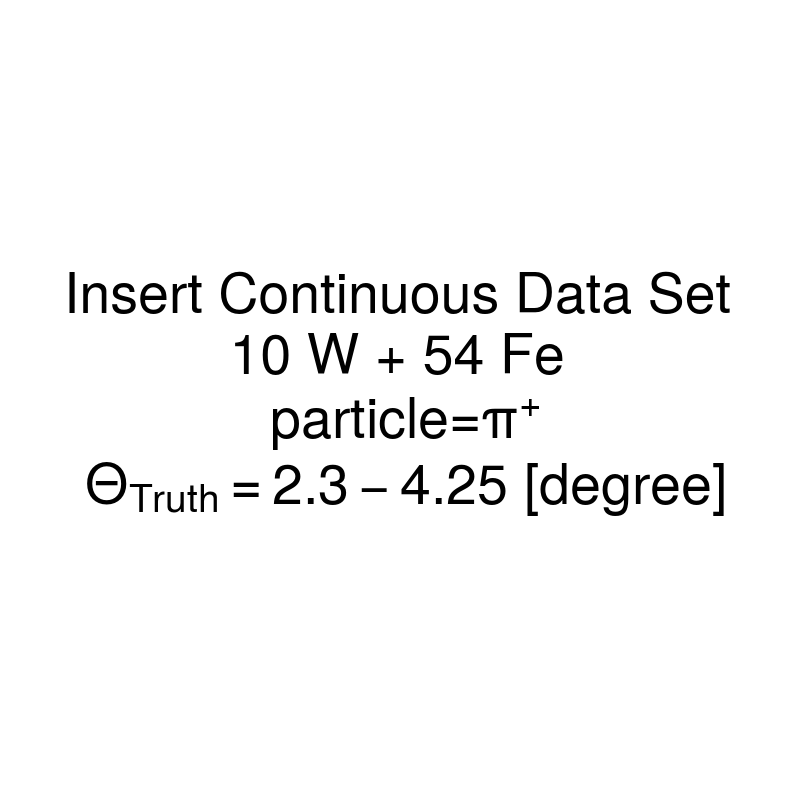

In [16]:
from matplotlib.backends.backend_pdf import PdfPages
path_to_output_file='/home/bishnu/bishnu/EIC/QAPlots'
# Create a PDF file to save the plots
pdf_pages = PdfPages(f'{path_to_output_file}/QAPlots_{detector}_{absorber}_{data_type}.pdf')

fig0, ax0 = plt.subplots()


ax0.text(0.5, 0.5, f'{title}', fontsize=40, ha='center', va='center', color='black')

# Remove axis labels and ticks
ax0.axis('off')
pdf_pages.savefig(fig0 ,  bbox_inches='tight')


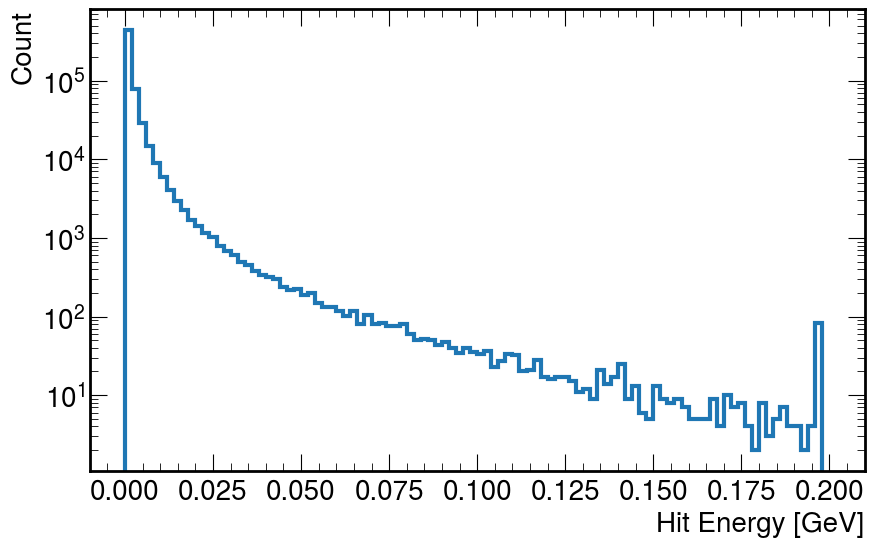

In [17]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.hist(ak.flatten(hit_e), bins=100, range=(0, 0.2), histtype='step', linewidth=3)
ax1.set_ylabel("Count", fontsize=20)
ax1.set_xlabel("Hit Energy [GeV]", fontsize=20)
ax1.set_yscale('log')
ax1.yaxis.set_tick_params(labelsize=20)
ax1.xaxis.set_tick_params(labelsize=20)
pdf_pages.savefig(fig1 ,  bbox_inches='tight')
#plt.close(fig1) 

0 [[17, 17, 17, 17, 17, 17, 20, 17, 14, ..., 20, -4, 20, 20, 20, 17, 17, 20], ...] X position
-95.0     65.0     32
1 [[0, 0, 0, 0, -3, -3, 0, 0, 0, 3, 3, ..., 3, 0, 0, -24, 3, 3, 0, 0, 3, -3], ...] Y Position
-65.0     65.0     26
2 [[382, 384, 386, 388, 396, 388, 398, ..., 429, 425, 439, 447, 431, 433], ...] Z position
381.76498     512.96497     26


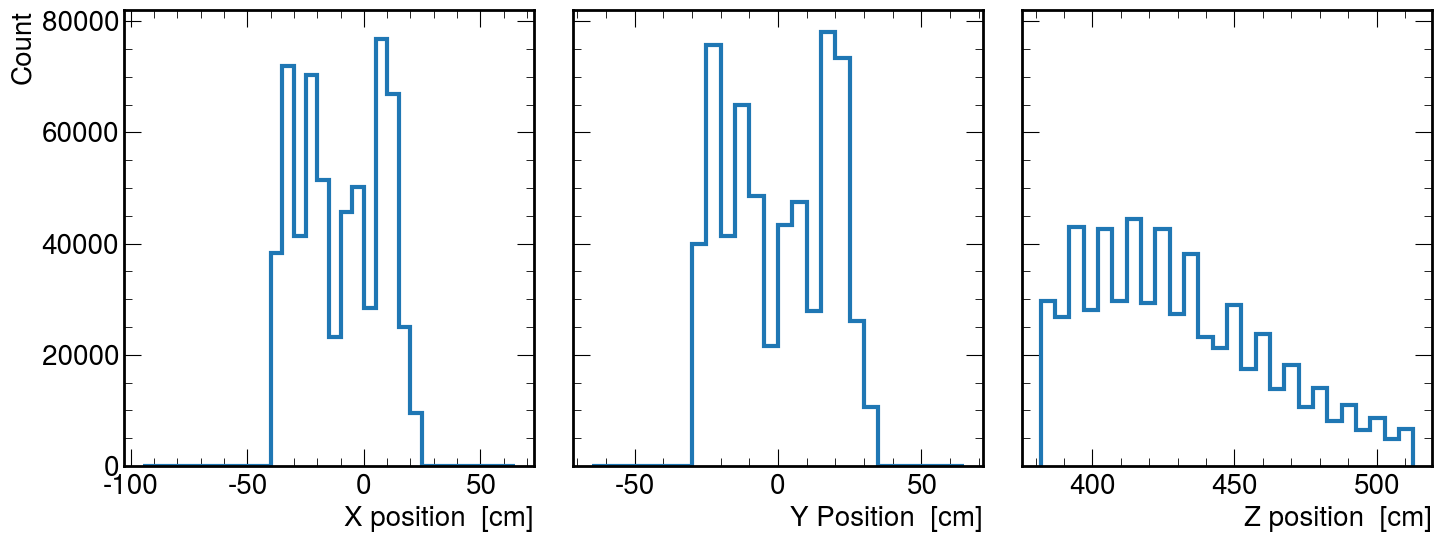

In [18]:
fig2, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)
variables=[posx, posy, posz]
titles=['X position', 'Y Position', 'Z position']
for index, (variable, title) in enumerate(zip(variables, titles)):
    print(index, variable, title)
    min_range=np.min(ak.flatten(variable))
    max_range=np.max(ak.flatten(variable))
    nbins=int((max_range-min_range)/5.0)
    print(min_range, '   ', max_range, '   ',nbins)


    ax2[index].hist(ak.flatten(variable), bins=nbins, histtype='step', linewidth=3)
    if index==0:
        ax2[index].set_ylabel("Count", fontsize=20)
    ax2[index].set_xlabel(f"{titles[index]}  [cm]", fontsize=20)
    ax2[index].yaxis.set_tick_params(labelsize=20)
    ax2[index].xaxis.set_tick_params(labelsize=20)
plt.tight_layout()
pdf_pages.savefig(fig2,   bbox_inches='tight')
#pdf_pages.close()

#plt.close(fig2)
    



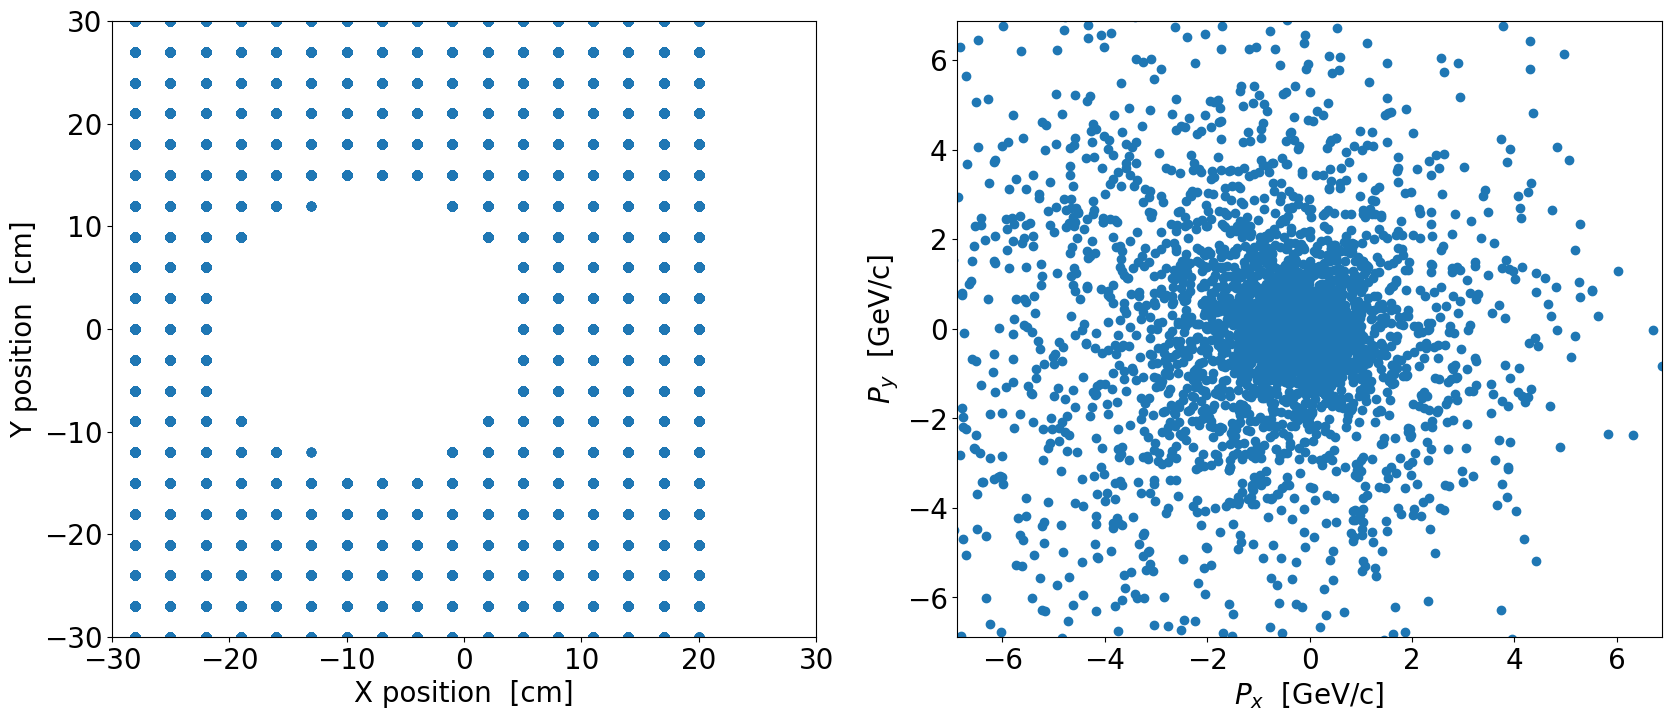

In [6]:
fig3, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
xrange=np.max(ak.flatten(posx))+10
ax[0].scatter(ak.flatten(posx),ak.flatten(posy))
ax[0].set_xlim(-xrange, xrange)
ax[0].set_ylim(-xrange, xrange)
ax[0].set_xlabel("X position  [cm]", fontsize=20)
ax[0].set_ylabel("Y position  [cm]", fontsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[0].xaxis.set_tick_params(labelsize=20)




xrange=np.max(genPx)
ax[1].scatter(genPx,genPy)
ax[1].set_xlim(-xrange, xrange)
ax[1].set_ylim(-xrange, xrange)

#cb = fig.colorbar(hp, label='counts')
#cb.set_label('counts', fontsize=25) 
ax[1].set_xlabel("$P_{x}$  [GeV/c]", fontsize=20)
ax[1].set_ylabel("$P_{y}$  [GeV/c]", fontsize=20)

ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)

#plt.subplots_adjust(wspace=0.2, hspace=0.3)
pdf_pages.savefig(fig3,   bbox_inches='tight')
plt.show()

#plt.tight_layout()
#plt.colorbar()
#plt.show()


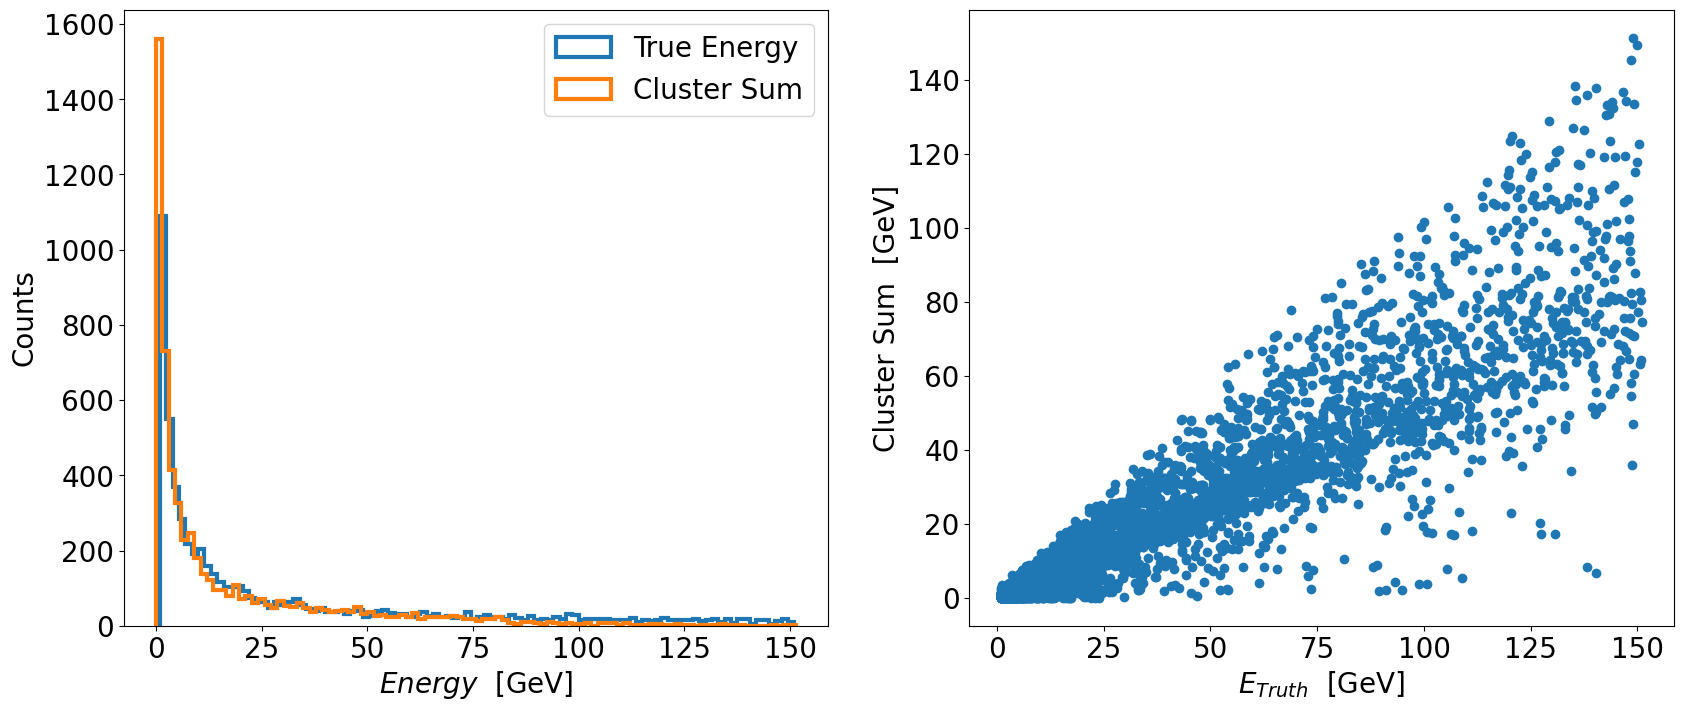

In [7]:
fig4, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].hist(gen_energy, bins=100,  label='True Energy', histtype='step', linewidth=3)
ax[0].hist(cluster_sum_total, bins=100, label='Cluster Sum', histtype='step', linewidth=3)

ax[0].set_xlabel("$Energy$  [GeV]", fontsize=20)
ax[0].set_ylabel("Counts", fontsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].legend(fontsize=20)

xrange=np.max(gen_energy)+10
#hb=ax[1].hexbin(gen_energy,cluster_sum,gridsize=50, extent=(0,xrange,0,xrange))
ax[1].scatter(gen_energy,cluster_sum_total)

#cb = fig.colorbar(hb, label='counts')
#cb.set_label('counts', fontsize=25) 
ax[1].set_xlabel("$E_{Truth}$  [GeV]", fontsize=20)
ax[1].set_ylabel("Cluster Sum  [GeV]", fontsize=20)

ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)


pdf_pages.savefig(fig4, bbox_inches='tight')
#pdf_pages.close()

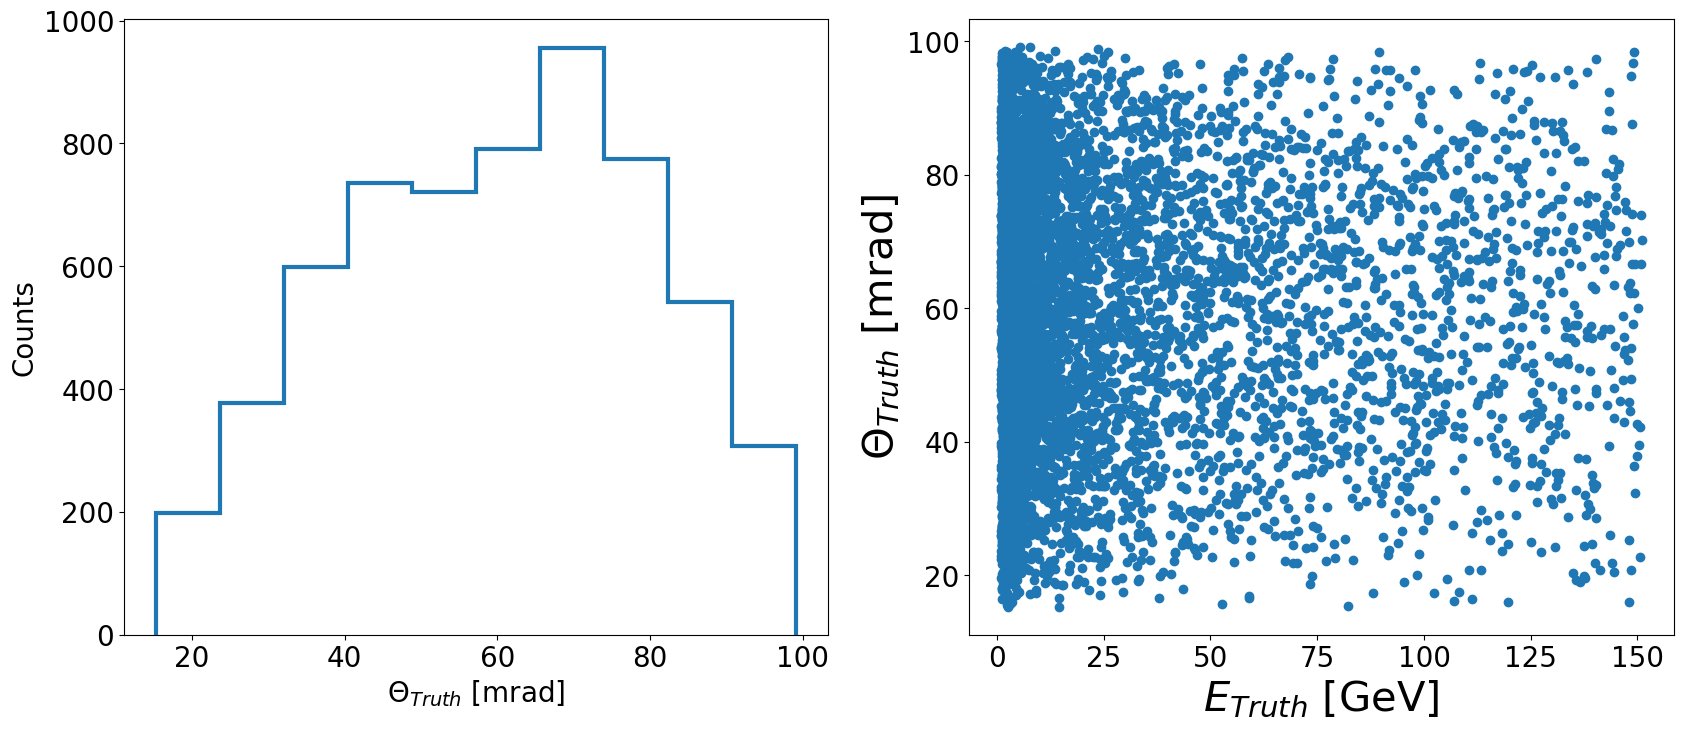

In [8]:
fig5, ax5 = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax5[0].hist(theta, histtype='step', linewidth=3)
ax5[0].set_xlabel('$\Theta_{Truth}$ [mrad]', fontsize=20)
ax5[0].set_ylabel('Counts', fontsize=20)
ax5[0].yaxis.set_tick_params(labelsize=20)
ax5[0].xaxis.set_tick_params(labelsize=20)


xrange_E=np.max(gen_energy)+10
xrange_theta=np.max(theta)
#hb=ax[1].hexbin(gen_energy,theta,gridsize=100, extent=(0,xrange_E,0,xrange_theta))
ax5[1].scatter(gen_energy,theta)
#cb = fig.colorbar(hb, label='counts')
#cb.set_label('counts', fontsize=25) 

ax5[1].set_xlabel("$E_{Truth}$ [GeV]", fontsize=30)
ax5[1].set_ylabel("$\Theta_{Truth}$ [mrad]", fontsize=30)

ax5[1].yaxis.set_tick_params(labelsize=20)
ax5[1].xaxis.set_tick_params(labelsize=20)
pdf_pages.savefig(fig5, bbox_inches='tight')


['HcalEndcapHitsDigi.cellID', 'HcalEndcapHitsDigi.amplitude', 'HcalEndcapHitsDigi.timeStamp', 'HcalEndcapPHitsReco.cellID', 'HcalEndcapPHitsReco.energy', 'HcalEndcapPHitsReco.energyError', 'HcalEndcapPHitsReco.time', 'HcalEndcapPHitsReco.timeError', 'HcalEndcapPHitsReco.position.x', 'HcalEndcapPHitsReco.position.y', 'HcalEndcapPHitsReco.position.z', 'HcalEndcapPHitsReco.dimension.x', 'HcalEndcapPHitsReco.dimension.y', 'HcalEndcapPHitsReco.dimension.z', 'HcalEndcapPHitsReco.sector', 'HcalEndcapPHitsReco.layer', 'HcalEndcapPHitsReco.local.x', 'HcalEndcapPHitsReco.local.y', 'HcalEndcapPHitsReco.local.z', 'HcalEndcapPInsertHitsDigi.cellID', 'HcalEndcapPInsertHitsDigi.amplitude', 'HcalEndcapPInsertHitsDigi.timeStamp', 'HcalEndcapPInsertHitsReco.cellID', 'HcalEndcapPInsertHitsReco.energy', 'HcalEndcapPInsertHitsReco.energyError', 'HcalEndcapPInsertHitsReco.time', 'HcalEndcapPInsertHitsReco.timeError', 'HcalEndcapPInsertHitsReco.position.x', 'HcalEndcapPInsertHitsReco.position.y', 'HcalEndcap

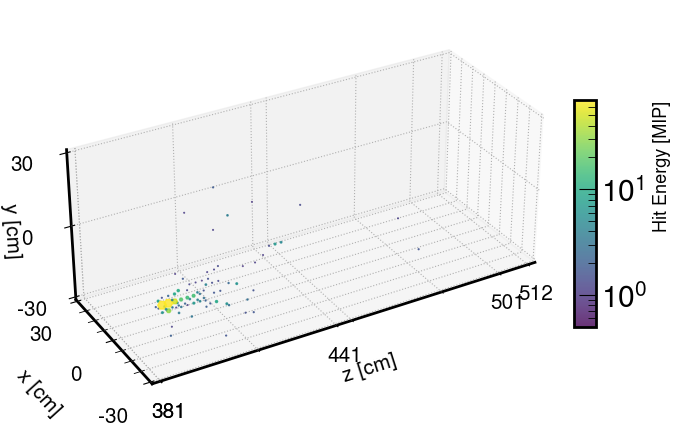

In [9]:
%matplotlib inline
import uproot as ur
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")
#MIP=0.0006
MIP= 0.000472


def get_XYZ_dim(posx, posy, posz):
    x_min=int(np.min(ak.flatten(posx)))
    x_max=int (np.max(ak.flatten(posx)))
    
    y_min=int(np.min(ak.flatten(posy)))
    y_max=int(np.max(ak.flatten(posy)))
    
    z_min=int(np.min(ak.flatten(posz)))
    z_max=int(np.max(ak.flatten(posz)))
    
    #print(x_min, '    ', x_max, '   ', y_min, '   ', y_max, '    ', z_min, '      ', z_max)
    return x_min, x_max, y_min, y_max, z_min, z_max
def draw_event(input_file, event, detector):
    scale_canvas=0.9
    
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
        MIP_TH=0.5 * 0.0006
        Time_TH=150
        theta_max=600.0
        sampling_fraction=0.0224
    elif detector=='ecal':
        detector_name = "EcalEndcapPHitsReco"
        MIP_TH=0.5 * 0.13
        Time_TH=150
        theta_max=600.0
        sampling_fraction=1.0
        
    elif detector=="insert":
        detector_name= "HcalEndcapPInsertHitsReco"
        MIP_TH=0.5 * 0.0006
        Time_TH=150.0
        theta_max=600.0
        sampling_fraction=0.0224
        
    elif detector=="zdc":
        detector_name="ZDCHcalHitsReco"
        MIP_TH=0.5 * 0.000393
        Time_TH=275.0
        theta_max=10.0
        sampling_fraction=0.0216
        
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
    #fig, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(8*scale_canvas, 16*scale_canvas))
    fig=plt.figure( figsize=(8*scale_canvas, 16*scale_canvas))
    ax1 = fig.add_subplot(211, projection='3d',azim=-120, elev=30)
    
    
    my_cmap = plt.get_cmap('viridis')
    
    root_files = os.listdir(input_file)
    selected_file = random.choice(root_files)
    file = os.path.join(file_path, selected_file)
    events = ur.open(f'{file}:events')
    num_entries = events.num_entries
    arrays_sim = events.arrays()
    print(arrays_sim.fields)
    E=arrays_sim[f'{detector_name}.energy'][event,:]
    x=arrays_sim[f'{detector_name}.position.x'][event,:]/10.
    y=arrays_sim[f'{detector_name}.position.y'][event,:]/10.
    z=arrays_sim[f'{detector_name}.position.z'][event,:]/10.
    
    slc=E>MIP
    sctt3d = ax1.scatter3D(z[slc], x[slc], y[slc],
                    alpha = 0.8,
                    c = E[slc]/MIP,
                    s=40*E[slc]/np.max(E),
                    cmap = my_cmap,
                    norm=mpl.colors.LogNorm(vmin=0.5, vmax=70),
                    marker ='H')
    
    
    print('Total Sum: ',ak.sum(E[slc]) /sampling_fraction)
    cbar = plt.colorbar(sctt3d, shrink=0.45, pad=0.12, aspect=10)
    cbar.set_label('Hit Energy [MIP]', fontsize=13)
    
    
    x_min, x_max, y_min, y_max, z_min, z_max=get_XYZ_dim(posx, posy, posz)
    print(x_min, '    ', x_max, '   ', y_min, '   ', y_max, '    ', z_min, '      ', z_max)
    #max_val_for_plot=np.max([x_max, y_max])
    max_val_for_plot=round(np.max([x_max, y_max])/10) *10
    #fig.colorbar(scat, shrink=0.4)
    '''
    if detector=='hcal':
    
        plt.xlim(370, 520) #z
        plt.ylim(-250,250) #x
        plt.gca().set_zlim(-250, 280) #y


        z_ticks = np.arange(-250, 300, 200)
        ax1.set_zticks(z_ticks)
        plt.gca().zaxis.labelpad = 0
    
    #-----------------------------
    if detector=='zdc':
        plt.xlim(3752, 3909) #z
        plt.ylim(-60,60) #x
        plt.gca().set_zlim(-60, 60) #y
        z_ticks = np.arange(-60, 61, 60)
        y_ticks = np.arange(-60, 61, 60)
        x_ticks = np.arange(3750, 3910, 60)
        ax1.set_zticks(z_ticks)
        ax1.set_yticks(y_ticks)
        specific_values = np.array([3750, 3910])

        # Generate an array with values between 3750 and 3910 with a step of 60
        x_ticks = np.arange(3750, 3910, 60)

        # Concatenate the specific values with the generated array
        x_ticks = np.concatenate([specific_values, x_ticks])
        ax1.set_xticks(x_ticks)

        plt.gca().zaxis.labelpad = -2
    
    
    '''
    plt.xlim(z_min, z_max) #z
    plt.ylim(-max_val_for_plot,max_val_for_plot) #x
    plt.gca().set_zlim(-max_val_for_plot, max_val_for_plot) #y
    
    
    
    
    z_ticks = np.arange(-max_val_for_plot, max_val_for_plot+1, max_val_for_plot)
    y_ticks = np.arange(-max_val_for_plot, max_val_for_plot+1, max_val_for_plot)
    #x_ticks = np.arange(z_min, z_max, 60)
    ax1.set_zticks(z_ticks)
    ax1.set_yticks(y_ticks)
    specific_values = np.array([z_min, z_max])
   
    # Generate an array with values between 3750 and 3910 with a step of 60
    x_ticks = np.arange(z_min, z_max, 60)

    # Concatenate the specific values with the generated array
    x_ticks = np.concatenate([specific_values, x_ticks])
    ax1.set_xticks(x_ticks)
    
    plt.gca().zaxis.labelpad = -2
    
    plt.gca().set_xlabel("\nz [cm]", fontsize=15)
    plt.gca().set_ylabel("\nx [cm]", fontsize=15)
    plt.gca().set_zlabel("y [cm]", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().zaxis.set_tick_params(labelsize=15)
    #Axes3D.zticks(fontsize=15)
    #plt.gca().set_xtick(fontsize=10)
    #plt.gca().axis('off')
    #plt.title(title)
    
    #plt.savefig(output_file)
    
    #plt.gca().set_anchor("SW")
    #plt.gca().set_box_aspect((18,42,32), zoom=1.2)
    plt.gca().set_box_aspect((180,70,70), zoom=1.2)
    plt.show()
    pdf_pages.savefig(fig, bbox_inches='tight')
    pdf_pages.close()
    return num_entries
'''    
detector='zdc_Fe'  

if detector=='zdc_Fe':
    detector_name = "ZDCHcalHitsReco"
    path=f'/media/miguel/Elements/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_08_18'
    rootfile=f'zdc_reco_neutron_log10continuous_1GeV-300GeV_theta_0deg-0.5deg_745019_29.edm4hep.root'
elif detector=='calice':
    detector_name='HcalEndcapPHitsReco'
    path=f'/media/miguel/Elements/calice_sim_data/calice_Fe_log10continuous_Size_equal_to_ECCE_HCAL_10_30deg_1_90Gev_09_20'
    rootfile='hadron_endcap_reco_pi+_log10continuous_1GeV-90GeV_theta_10deg-30deg_896277_901.edm4hep.root'
    
'''    
#FilePath=f'{path}/{rootfile}'    
#FilePath='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_10k_17deg_ECAL_1/reco_pi+_45GeV_theta_17-17deg_pi+_443129_92.edm4hep.root'
num_entries=draw_event(file_path, 0, detector)
random_numbers = random.sample(range(num_entries), 4)



In [100]:
num_entries=draw_event(file_path, random_numbers[1], detector)

In [101]:
num_entries=draw_event(file_path, random_numbers[2], detector)

[518, 2824, 2523, 2067]


In [ ]:
num_entries=draw_event(file_path, random_numbers[3], detector)

In [57]:

    
x_min, x_max, y_min, y_max, z_min, z_max=get_XYZ_dim(posx, posy, posz) 
max_val_for_plot=round(np.max([x_max, y_max])/10) *10
print(max_val_for_plot)

30


30
30
